<div style="text-align: center">
  <h1 style="font-size: 48px;">Consumo de Moluscos Bivalves</h1>
</div>
    
<div style="text-align: center"> <h2>Análise Exploratória e Calculo do Consumo dos dados do IAN_AF<h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
#sns.set_style("whitegrid")
plt.style.use("bmh")
import warnings
warnings.filterwarnings("ignore")

# Introdução

Análise dos dados provenientes do Inquérito Alimentar Nacional e da Atividade Física (IAN-AF). Mais especificamento análise do consumo de moluscos bivalves.
O Inquérito Alimentar Nacional e de Atividade Física (IAN-AF) foi realizado em Portugal entre os anos de 2015 e 2016. O objetivo principal do inquérito foi avaliar o estado nutricional da população portuguesa, bem como a sua alimentação e níveis de atividade física.
A amostra do inquérito foi representativa da população portuguesa, com idades entre os 3 meses e os 84 anos. Foram incluídos no estudo um total de 6648 participantes, que foram selecionados através de um processo de amostragem aleatória estratificada por conglomerados.
O IAN-AF foi conduzido por uma equipa de investigadores do Instituto Nacional de Saúde Doutor Ricardo Jorge (INSA), em colaboração com outras instituições nacionais e internacionais. Os resultados do inquérito foram publicados em 2017, numa série de relatórios técnicos e científicos que estão disponíveis para consulta pública.

As entrevistas foram destribuidas ao longo de 12 meses, ou seja, os dados análisados de seguida dizem respeito ao consumo de moluscos bivalves no espaço temporal de 365 dias.

# Objetivos

Determinar o consumo de cada espécie de moluscos bivalves na população portuguesa, por sexo, grupo etário e região.

# Análise Exploratória

In [2]:
dataset = pd.read_excel("Consumo_Bivalves_Análise_R.xlsx")

In [3]:
dataset.head()

,Espécie,IAN_ID,Entrevista,Refeição,Prato,Receita,ING_ID,Cru.Edível,Cru.Bruto,NUT,PSU,Ponderador1,Ponderador2,Sexo,Idade,GrupoEtario
0,Ameijoa,1-02-01-1-15-020,2,Almoço,Arroz de Marisco,RCP_915,80300005,10.304279,36.800998,1,1.02,5694.805467,6749.5020,1,28,3
1,Ameijoa,1-04-01-0-13-032,2,Almoço,Arroz de Marisco,RCP_915,80300005,2.033220,7.261500,1,1.04,816.666667,816.6667,1,5,1
2,Ameijoa,1-04-01-0-16-136,1,Almoço,Amêijoas à Bulhão Pato,RCP_1379,80300005,35.653527,127.334025,1,1.04,5302.083333,5302.0830,1,57,3
3,Ameijoa,1-08-01-0-07-026,2,Almoço,Feijoada de Marisco,RCP_52,80300005,5.148542,18.387651,1,1.08,7124.326538,7124.3270,0,70,4
4,Ameijoa,1-08-01-0-16-135,1,Almoço,Carne de Porco à Alentejana,RCP_609,80300005,28.921198,103.289994,1,1.08,8443.085944,8443.0860,1,37,3


__Significado de variáveis relevantes para o estudo:__

> **Espécie**: Espécie de molusco bivalve consumida

> **IAN_ID**: Identificação do participante.

> **Cru.Edível**: parte comestível de um alimento após a remoção de partes não comestíveis (g/refeição)

> **Cru.Bruto**: peso total de um alimento, incluindo partes não comestíveis (g/refeição)

É de salientar que entre estas duas últimas variáveis a Cru.Edível será utilizada neste estudo para inferir o consumo.

> **NUT**:  Região do País à qual pertence o participante:
* 1 = Norte
* 2 = Centro
* 3 = Área Metropolitana de Lisboa
* 4 = Alentejo
* 5 = Algarve
* 6 = Região Autónoma da Madeira
* 7 = Região Autónoma dos Açores

> **PSU**: Primary Sample Unit à qual pertence o 
participante.

> **Ponderador1**: Ponderador calculado para a taxa de 
participação da primeira entrevista 
(flowchart ≥ 6 ). Utilizado para calculo das dimensões de atividade fisica

> **Ponderador2**: Ponderador calculado para a taxa de 
participação da segunda entrevista 
(flowchart =7 )

> **Sexo**:Sexo do participante: 
* 0 = Feminino
* 1 = Masculino

> **Idade**: Idade do participante (anos) - inteiro, 
arredondamento por defeito.

> **GrupoEtario**: Grupoo etário correspondente à idade na 
primeira entrevista.
* 1 = Crianças (<10 anos)
* 2 = Adolescentes (10-17 anos)
* 3 = Adultos (18-84 anos)
* 4 = Idosos (>84 anos)

In [4]:
dataset.shape

(299, 16)

In [5]:
dataset["IAN_ID"].nunique()

204

In [6]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 299    │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 16     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean       ┃ sd     ┃ p0        ┃ p25       ┃ p75       ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Entrevista    │   0 │     0 │        1.5 │    0.5 │         1 │         1 │         2 │         2 │ █    █ │  │
│ │ ING_ID        │   0 │     0 │   80000000 │  12000 │  80000000 │  80000000 │  80000000 │  80000000 │      █ │  │
│ │ Cru.Edível    │   0 │     0 │         20 │     23 │      0.76 │       5.2 │        29 │       130 │  █▃▁   │  │
│ │ Cru.Bruto     │   0 │     0 │         74 │     82 │       3.1 │        18 │       100 │       640 │   █▁   │  │
│ │ NUT           │   0 │     0 │        3.7 │    1.8 │         1 │         2 │         5 │         7 │ ▅▆▆▅█▅ │  │
│ │ PSU           │   0 │     0 │        3.8 │    1.8 │         1 │       2.1 │       5.1 │       7.1 │ ▅▆▇▅█▃ │  │
│ │ Ponderador1   │   0 │     0 │       1800 │   1800 │        24 │       510 │      2400 │      9700 │  █▃▁▁  │  │
│ │ Ponderador2   │   0 │     0 │       1900 │   2000 │        29 │       560 │      2700 │      9700 │  █▃▁▁  │  │
│ │ Sexo          │   0 │     0 │       0.55 │    0.5 │         0 │         0 │         1 │         1 │ ▆    █ │  │
│ │ Idade         │   0 │     0 │         37 │     20 │         1 │        22 │        52 │        84 │ ▅▆█▆▅▁ │  │
│ │ GrupoEtario   │   0 │     0 │        2.8 │   0.78 │         1 │         3 │         3 │         4 │ ▁ ▁ █▁ │  │
│ └───────────────┴─────┴───────┴────────────┴────────┴───────────┴───────────┴───────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Espécie                   │       0 │          0 │                            1 │                      300 │  │
│ │ IAN_ID                    │       0 │          0 │                            1 │                      300 │  │
│ │ Refeição                  │       0 │          0 │                            1 │                      300 │  │
│ │ Prato                     │       0 │          0 │                            1 │                      300 │  │
│ │ Receita                   │      32 │         11 │                            1 │                      300 │  │
│ └───────────────────────────┴─────────┴────────────┴──

Tal como podemos observar só temos NaN´s na variável receita, cerca de 11%. Pelo que este não constitui um problema pois está não se trata de uma variável relevante para o estudo.

In [7]:
dataset.drop(columns=["Entrevista","ING_ID"], inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Espécie      299 non-null    object 
 1   IAN_ID       299 non-null    object 
 2   Refeição     299 non-null    object 
 3   Prato        299 non-null    object 
 4   Receita      267 non-null    object 
 5   Cru.Edível   299 non-null    float64
 6   Cru.Bruto    299 non-null    float64
 7   NUT          299 non-null    int64  
 8   PSU          299 non-null    float64
 9   Ponderador1  299 non-null    float64
 10  Ponderador2  299 non-null    float64
 11  Sexo         299 non-null    int64  
 12  Idade        299 non-null    int64  
 13  GrupoEtario  299 non-null    int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 32.8+ KB


In [9]:
# Alterar datatype das variáveis: NUT, Sexo e GrupoEtário para string
dataset["NUT"] = dataset["NUT"].astype("str")
dataset["Sexo"] = dataset["Sexo"].astype("str")
dataset["GrupoEtario"] = dataset["GrupoEtario"].astype("str")

In [10]:
dataset.describe()

,Cru.Edível,Cru.Bruto,PSU,Ponderador1,Ponderador2,Idade
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,20.481754,74.161033,3.767224,1771.336132,1948.426925,36.953177
std,22.513592,82.328706,1.817724,1794.592805,1955.344402,20.229667
min,0.762457,3.121875,1.010000,24.344477,29.209590,1.000000
25%,5.152140,18.400499,2.130000,506.131177,562.787550,21.500000
50%,12.182560,45.959727,4.020000,1258.566374,1377.114000,37.000000
75%,28.921198,103.289994,5.080000,2374.466903,2693.155611,52.000000
max,134.000000,638.095238,7.060000,9663.893870,9663.894000,84.000000


Analisando a tabela anterior é possível concluir os seguintes factos acerca das nossas variáveis:
* **Cru.Edível**: varia entre 0.76g/refeição e 134 g/refeição, tendo em média sido consumido cerca de 20.48 g de moluscos bivalves por refeição.

* **Idade**: é verificado que o consumo de moluscos bivalves é efetuada por pessoas desde os 1 anos até aos 84 anos, o que representa grupos etários da classe 1 até à classe 4.

_Espécie_

In [93]:
dataset["Espécie"].value_counts()

Ameijoa       208
Berbigao       44
Mexilhao       38
Conquilhas      4
Vieiras         3
Ostra           2
Name: Espécie, dtype: int64

In [96]:
dataset["Espécie"] = dataset["Espécie"].str.replace("Ameijoa","Amêijoa")
dataset["Espécie"] = dataset["Espécie"].str.replace("Berbigao","Berbigão")
dataset["Espécie"] = dataset["Espécie"].str.replace("Mexilhao","Mexilhão")

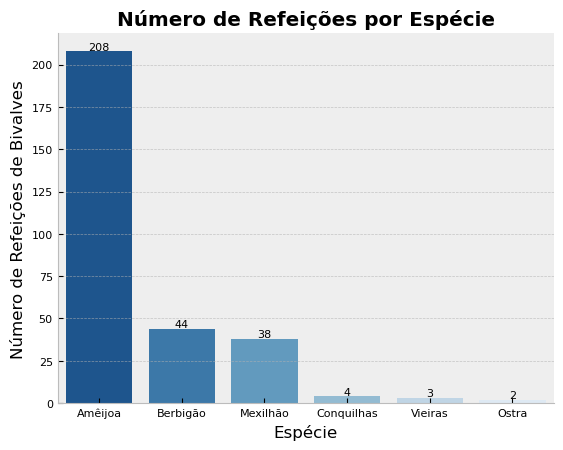

In [97]:
plot= sns.countplot(x="Espécie", data=dataset, order=dataset["Espécie"].value_counts().index,palette= sns.color_palette("Blues_r", n_colors=6))

plt.title("Número de Refeições por Espécie", fontweight="bold")
plt.xlabel("Espécie")
plt.ylabel("Número de Refeições de Bivalves")

for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline", fontsize=8,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

Tal como é possível verificar a espécie ameijoa é a que apresenta maior número de dados com 208 refeições/365 dias. Pelo o contrário a espécie ostra é a que apresenta menor número de daods com 2 refeições/365 dias.

_Grupo Etário_

In [13]:
dataset["GrupoEtario"].value_counts()

3    209
1     35
4     31
2     24
Name: GrupoEtario, dtype: int64

In [14]:
dataset["GrupoEtario"] = dataset["GrupoEtario"].str.replace("3","Adultos")
dataset["GrupoEtario"] = dataset["GrupoEtario"].str.replace("1","Crianças")
dataset["GrupoEtario"] = dataset["GrupoEtario"].str.replace("2","Adolescentes")
dataset["GrupoEtario"] = dataset["GrupoEtario"].str.replace("4","Idosos")

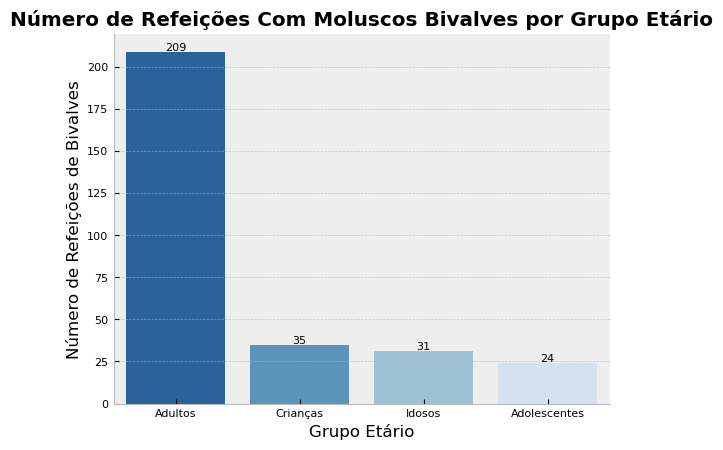

In [15]:
plot=sns.countplot(x="GrupoEtario", data=dataset, order=dataset["GrupoEtario"].value_counts().index, palette= sns.color_palette("Blues_r", n_colors=4))

plt.title("Número de Refeições Com Moluscos Bivalves por Grupo Etário", fontweight="bold")
plt.xlabel("Grupo Etário")
plt.ylabel("Número de Refeições de Bivalves")

for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline", fontsize=8,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

_Sexo_

In [16]:
dataset["Sexo"].value_counts()

1    165
0    134
Name: Sexo, dtype: int64

In [17]:
dataset["Sexo"] = dataset["Sexo"].str.replace("1","Masculino")
dataset["Sexo"] = dataset["Sexo"].str.replace("0","Feminino")

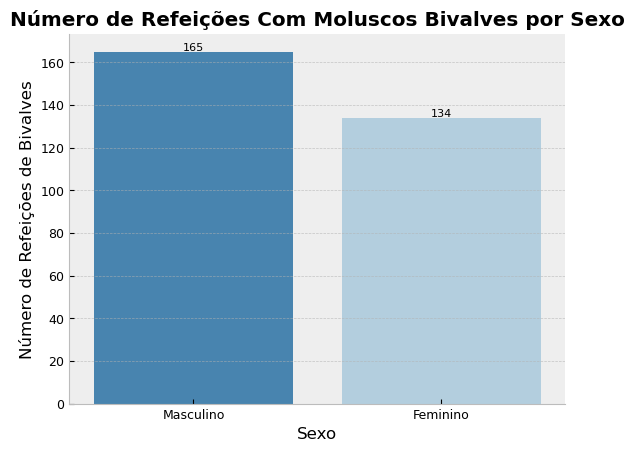

In [18]:
plot = sns.countplot(x="Sexo", data=dataset, order=dataset["Sexo"].value_counts().index, palette = sns.color_palette("Blues_r",2))

plt.title("Número de Refeições Com Moluscos Bivalves por Sexo", fontweight="bold")
plt.xlabel("Sexo")
plt.ylabel("Número de Refeições de Bivalves")

for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline", fontsize=8,
                  color="black",xytext=(0,1),
                  textcoords="offset points")
    
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

_Nut_

In [19]:
dataset["NUT"].value_counts()

5    68
2    52
3    50
1    44
4    39
7    29
6    17
Name: NUT, dtype: int64

1 = Norte
2 = Centro
3 = Área Metropolitana de Lisboa
4 = Alentejo
5 = Algarve
6 = Região Autónoma da Madeira
7 = Região Autónoma dos Açores

In [79]:
dataset["NUT"] = dataset["NUT"].str.replace("1","Norte")
dataset["NUT"] = dataset["NUT"].str.replace("2","Centro")
dataset["NUT"] = dataset["NUT"].str.replace("3","Área Metropolitana de Lisboa")
dataset["NUT"] = dataset["NUT"].str.replace("4","Alentejo")
dataset["NUT"] = dataset["NUT"].str.replace("5","Algarve")
dataset["NUT"] = dataset["NUT"].str.replace("6","Região Autónoma da Madeira")
dataset["NUT"] = dataset["NUT"].str.replace("7","Região Autónoma dos Açores")

In [83]:
nut = pd.DataFrame(dataset["NUT"].value_counts())
nut.reset_index(inplace=True)
nut.rename(columns={"index":"Região"},inplace=True)
nut

,Região,NUT
0,Algarve,68
1,Centro,52
2,Área Metropolitina de Lisboa,50
3,Norte,44
4,Alentejo,39
5,Região Autónoma dos Açores,29
6,Região Autónoma da Madeira,17


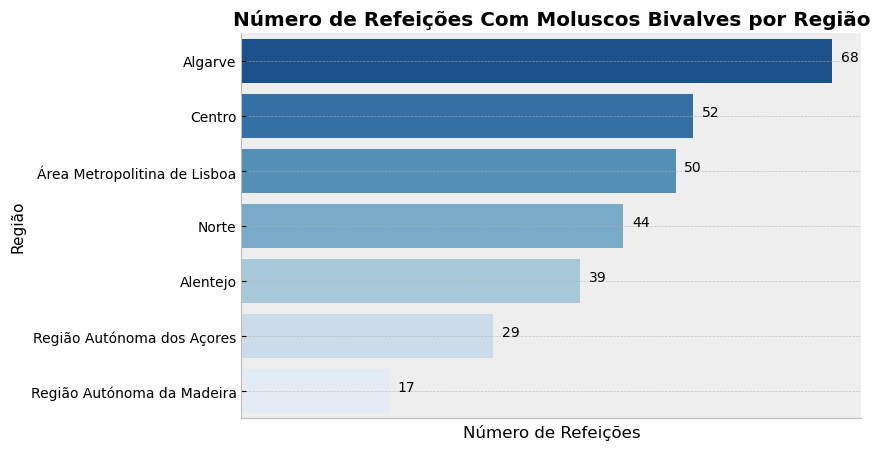

In [92]:
plt.figure(figsize=(8,5))
plot = sns.countplot(y="NUT", data=dataset, order=dataset["NUT"].value_counts().index, palette=sns.color_palette("Blues_r",7))

plt.title("Número de Refeições Com Moluscos Bivalves por Região", fontweight="bold")
plt.xlabel("Número de Refeições")
plt.ylabel("Região",fontsize=11)
plt.xticks([])
plt.yticks(fontsize=10)
for i, v in enumerate(nut["NUT"]):
    plt.text(v + 1, i, str(v), color='black', fontsize=10)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

,Região,NUT
0,Algarve,68
1,Centro,52
2,Área Metropolitina de Lisboa,50
3,Norte,44
4,Alentejo,39
5,Região Autónoma dos Açores,29
6,Região Autónoma da Madeira,17


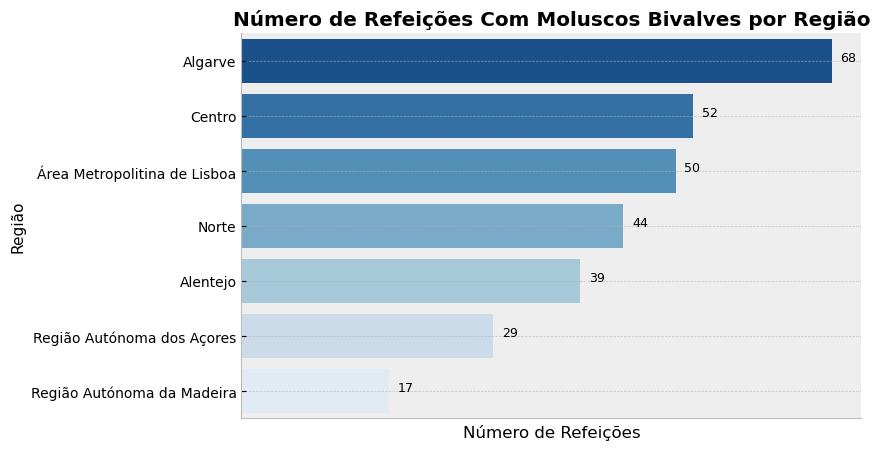

In [102]:
plt.figure(figsize=(8, 5))

plot = sns.countplot(y="NUT", data=dataset, order=dataset["NUT"].value_counts().index, palette=sns.color_palette("Blues_r", 7))

plt.title("Número de Refeições Com Moluscos Bivalves por Região", fontweight="bold")
plt.xlabel("Número de Refeições")
plt.ylabel("Região", fontsize=11)
plt.xticks([])
plt.yticks(fontsize=10)

for i, v in enumerate(nut["NUT"]):
    plt.text(v + 1, i, str(v), color='black', fontsize=9)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

In [22]:
dataset.groupby("Espécie").agg("mean","std")

,Cru.Edível,Cru.Bruto,PSU,Ponderador1,Ponderador2,Idade
Espécie,,,,,,
Ameijoa,22.179096,79.607755,3.996971,1571.326896,1741.944130,36.043269
Berbigao,12.228403,58.230490,2.617500,2491.993104,2727.109339,36.250000
Conquilhas,71.467200,148.890000,5.082500,830.039793,895.906650,43.000000
Mexilhao,16.282931,55.818740,3.653947,2192.674756,2366.156175,42.815789
Ostra,10.800000,120.000000,5.085000,628.116671,706.645150,37.000000
Vieiras,15.507533,32.307361,3.503333,1749.259717,1783.869733,28.000000


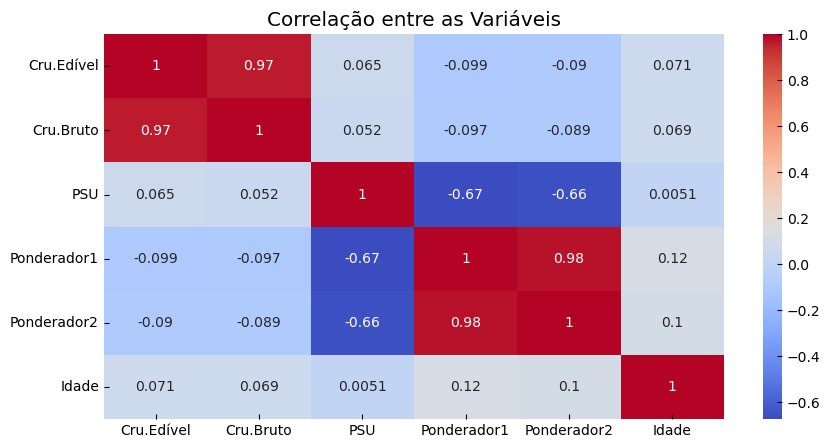

In [23]:
corr = dataset.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap = "coolwarm")
plt.title("Correlação entre as Variáveis")
plt.show()

Tendo em consideração os nossos dados não faz sentido analisar a correlação de todas as variáveis. Sendo só interessante ver a correlaçãoe entre idade e cru.edível

In [24]:
coor_data= dataset[["Cru.Edível","Idade"]]

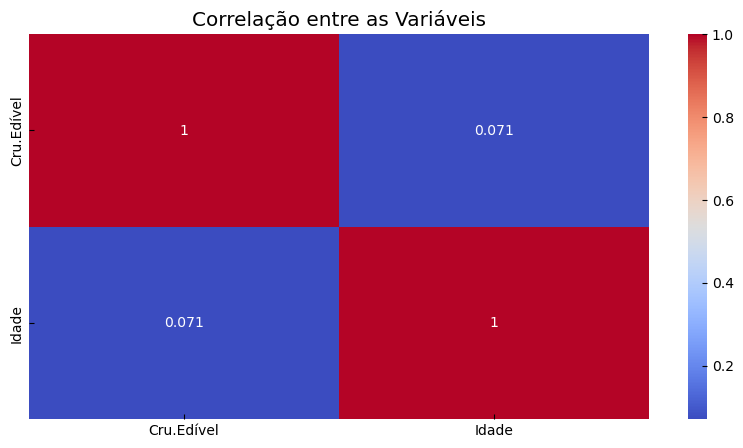

In [25]:
corr = coor_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap = "coolwarm")
plt.title("Correlação entre as Variáveis")
plt.show()

É possível verificar que a correlação entre o consumo de bivalves e a idade é muito fraca, sendo possível concluir que aparentemente não parece que o consumo de bivalves esteja associada à idade. Porém este facto será analisado com mais detalhe.

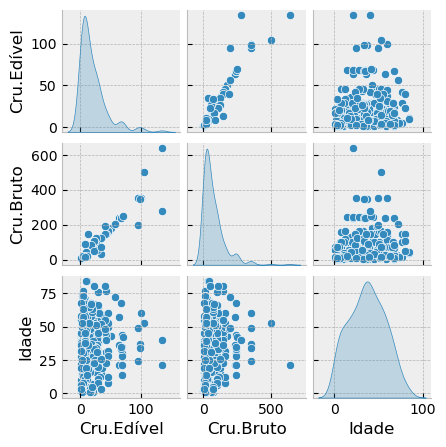

In [26]:
sns.pairplot(dataset[["Cru.Edível","Cru.Bruto","Idade"]], height=1.5,diag_kind = 'kde')
plt.show()

É verificado que as variáveis Cru.Edível e Cru.Bruto não seguem uma distribuição normal, mas sim uma distribuição logaritmica. Porém a variável idade apresenta uma distribuição normal

<AxesSubplot:xlabel='Cru.Edível'>

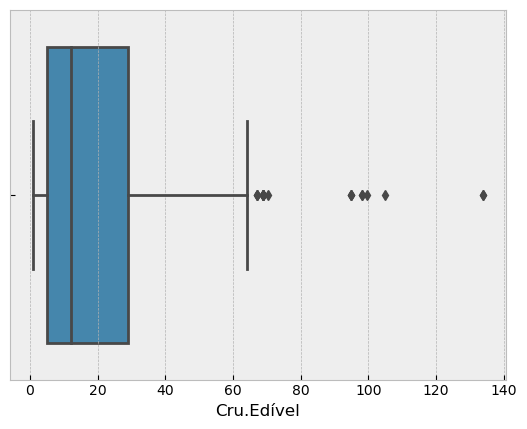

In [27]:
sns.boxplot(dataset["Cru.Edível"])

<AxesSubplot:xlabel='Espécie', ylabel='Cru.Edível'>

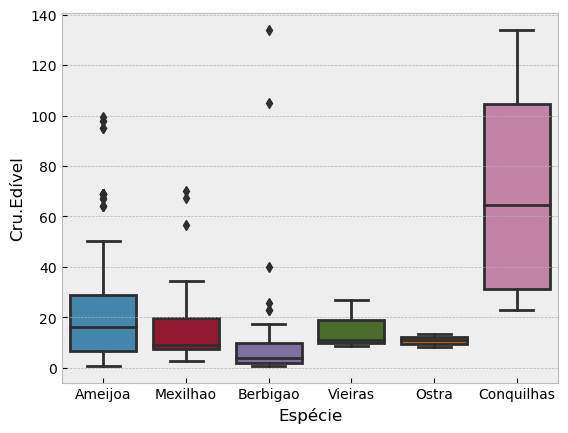

In [28]:
sns.boxplot(dataset["Espécie"], dataset["Cru.Edível"])

Analisando ambos os boxplot´s é verificado que existem alguns outliers porém estes não são muitos o que não parece que vai influênciar os nossos resultados

# Determinação do consumo de cada espéicie de molusco bivalve

Para calcular o consumo de cada espécie de molusco bivalve é necessário efetuar as seguintes etapas:
1. Determinar a frequência de consumo em uma semana por espécie (F).
2. Calcular a quantidade média consumida em cada refeição de cada espécie, por sexo, grupo etário e região(Q).
3. Consumo semanal = F x Q

## Consumo por Espécie

In [29]:
# Frequência de Consumo
freq_semanal_esp = (dataset.groupby("Espécie")["Ponderador2"].sum() / dataset["Ponderador2"].sum())
freq_semanal_esp = freq_semanal_esp.to_frame()
freq_semanal_esp.rename(columns = {"Ponderador2":"Freq.Cons"}, inplace=True)
freq_semanal_esp.sort_values(by = "Freq.Cons", ascending=False, inplace=True)
freq_semanal_esp

,Freq.Cons
Espécie,
Ameijoa,0.621931
Berbigao,0.205968
Mexilhao,0.154338
Vieiras,0.009186
Conquilhas,0.006151
Ostra,0.002426


In [30]:
# Porção
porcao_esp = dataset.groupby("Espécie").agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))
porcao_esp

,Porção_Ponderada
Espécie,
Ameijoa,21.363532
Berbigao,8.914765
Conquilhas,39.359392
Mexilhao,18.528834
Ostra,10.487607
Vieiras,21.538420


In [31]:
# Consumo
consumo_esp = freq_semanal_esp.merge(porcao_esp, how="left", left_index=True, right_index=True)
consumo_esp["Consumo"] = ((consumo_esp["Freq.Cons"] * consumo_esp["Porção_Ponderada"])*7).round(2)
consumo_esp.sort_values(by="Consumo", ascending=False,inplace=True)
consumo_esp

,Freq.Cons,Porção_Ponderada,Consumo
Espécie,,,
Ameijoa,0.621931,21.363532,93.01
Mexilhao,0.154338,18.528834,20.02
Berbigao,0.205968,8.914765,12.85
Conquilhas,0.006151,39.359392,1.69
Vieiras,0.009186,21.538420,1.38
Ostra,0.002426,10.487607,0.18


In [32]:
consumo_esp = round(consumo_esp["Consumo"].mean(),2)
print(f"Consumo Semanal Médio de Moluscos Bivalves: {consumo_esp} g")

Consumo Semanal Médio de Moluscos Bivalves: 21.52 g


## Consumo Semanal de Amêijoa (g/semana)

Tal como foi verificado anteriormente a espécie de ameijoa foi a especia com maior registo de consumo semanal, sendo por este mesmo motivo efetuada de seguida uma análise mais detalhada do consumo de ameijoa.
Nesta análise pretende-se verificar qual as refeição e os pratos associados a um maior consumo de ameijoa

In [33]:
dataset.head()

,Espécie,IAN_ID,Refeição,Prato,Receita,Cru.Edível,Cru.Bruto,NUT,PSU,Ponderador1,Ponderador2,Sexo,Idade,GrupoEtario
0,Ameijoa,1-02-01-1-15-020,Almoço,Arroz de Marisco,RCP_915,10.304279,36.800998,Norte,1.02,5694.805467,6749.5020,Masculino,28,Adultos
1,Ameijoa,1-04-01-0-13-032,Almoço,Arroz de Marisco,RCP_915,2.033220,7.261500,Norte,1.04,816.666667,816.6667,Masculino,5,Crianças
2,Ameijoa,1-04-01-0-16-136,Almoço,Amêijoas à Bulhão Pato,RCP_1379,35.653527,127.334025,Norte,1.04,5302.083333,5302.0830,Masculino,57,Adultos
3,Ameijoa,1-08-01-0-07-026,Almoço,Feijoada de Marisco,RCP_52,5.148542,18.387651,Norte,1.08,7124.326538,7124.3270,Feminino,70,Idosos
4,Ameijoa,1-08-01-0-16-135,Almoço,Carne de Porco à Alentejana,RCP_609,28.921198,103.289994,Norte,1.08,8443.085944,8443.0860,Masculino,37,Adultos


In [34]:
ameijoa = dataset[dataset["Espécie"]=="Ameijoa"]
ameijoa

,Espécie,IAN_ID,Refeição,Prato,Receita,Cru.Edível,Cru.Bruto,NUT,PSU,Ponderador1,Ponderador2,Sexo,Idade,GrupoEtario
0,Ameijoa,1-02-01-1-15-020,Almoço,Arroz de Marisco,RCP_915,10.304279,36.800998,Norte,1.02,5694.805467,6749.50200,Masculino,28,Adultos
1,Ameijoa,1-04-01-0-13-032,Almoço,Arroz de Marisco,RCP_915,2.033220,7.261500,Norte,1.04,816.666667,816.66670,Masculino,5,Crianças
2,Ameijoa,1-04-01-0-16-136,Almoço,Amêijoas à Bulhão Pato,RCP_1379,35.653527,127.334025,Norte,1.04,5302.083333,5302.08300,Masculino,57,Adultos
3,Ameijoa,1-08-01-0-07-026,Almoço,Feijoada de Marisco,RCP_52,5.148542,18.387651,Norte,1.08,7124.326538,7124.32700,Feminino,70,Idosos
4,Ameijoa,1-08-01-0-16-135,Almoço,Carne de Porco à Alentejana,RCP_609,28.921198,103.289994,Norte,1.08,8443.085944,8443.08600,Masculino,37,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Ameijoa,7-05-06-1-12-339,Almoço,Massa de Marisco,RCP_715,17.476199,62.414998,Região Autónoma dos Açores,7.05,73.404540,76.14589,Masculino,2,Crianças
204,Ameijoa,7-05-07-0-17-366,Jantar,Carne de Porco à Alentejana,RCP_609,28.921198,103.289994,Região Autónoma dos Açores,7.05,390.484831,443.40900,Masculino,66,Idosos
205,Ameijoa,7-06-03-0-02-080,Jantar,Carne de Porco à Alentejana,RCP_609,16.243413,58.012188,Região Autónoma dos Açores,7.06,126.358749,151.88560,Feminino,3,Crianças
206,Ameijoa,7-06-03-0-11-028,Jantar,Carne de Porco à Alentejana,RCP_609,16.243413,58.012188,Região Autónoma dos Açores,7.06,46.835066,54.91904,Masculino,1,Crianças


__Consumo por Pessoa__

In [35]:
# Frequência
freq_ameijoa = (ameijoa.groupby("Espécie")["Ponderador2"].sum() / dataset["Ponderador2"].sum())
freq_ameijoa = freq_ameijoa.to_frame()
freq_ameijoa.rename(columns = {"Ponderador2":"Freq.Cons"}, inplace=True)
freq_ameijoa.sort_values(by = "Freq.Cons", ascending=False, inplace=True)
freq_ameijoa

,Freq.Cons
Espécie,
Ameijoa,0.621931


In [36]:
# Porção
porcao_ameijoa = ameijoa.groupby(["IAN_ID","Sexo","NUT","GrupoEtario"]).agg(Porção_Ponderada=("Cru.Edível", lambda x: np.average(x, weights=dataset.loc[x.index, "Ponderador2"])))
porcao_ameijoa

,,,,Porção_Ponderada
IAN_ID,Sexo,NUT,GrupoEtario,
1-02-01-1-15-020,Masculino,Norte,Adultos,10.304279
1-04-01-0-13-032,Masculino,Norte,Crianças,2.033220
1-04-01-0-16-136,Masculino,Norte,Adultos,35.653527
1-08-01-0-07-026,Feminino,Norte,Idosos,5.148542
1-08-01-0-16-135,Masculino,Norte,Adultos,28.921198
...,...,...,...,...
7-05-06-1-12-339,Masculino,Região Autónoma dos Açores,Crianças,9.612225
7-05-07-0-17-366,Masculino,Região Autónoma dos Açores,Idosos,28.921198
7-06-03-0-02-080,Feminino,Região Autónoma dos Açores,Crianças,16.243413


In [37]:
# Consumo
consumo_ameijoa = porcao_ameijoa
consumo_ameijoa["Freq.Cons"] = 0.621931
consumo_ameijoa["Consumo"] = (consumo_ameijoa["Freq.Cons"] * consumo_ameijoa["Porção_Ponderada"])*7 # *7 porque queremos consumo semanal
consumo_ameijoa.sort_values(by="Consumo", inplace=True)
consumo_ameijoa

,,,,Porção_Ponderada,Freq.Cons,Consumo
IAN_ID,Sexo,NUT,GrupoEtario,,,
7-03-02-0-02-343,Feminino,Região Autónoma dos Açores,Crianças,0.933800,0.621931,4.065314
6-02-01-0-03-394,Feminino,Região Autónoma da Madeira,Crianças,1.015508,0.621931,4.421029
7-03-06-0-03-169,Feminino,Região Autónoma dos Açores,Crianças,1.354010,0.621931,5.894706
7-05-04-0-03-199,Feminino,Região Autónoma dos Açores,Adolescentes,1.354010,0.621931,5.894706
1-04-01-0-13-032,Masculino,Norte,Crianças,2.033220,0.621931,8.851657
...,...,...,...,...,...,...
2-21-01-1-16-001,Masculino,Centro,Adultos,68.803399,0.621931,299.536766
5-05-01-0-15-122,Masculino,Algarve,Adultos,95.000000,0.621931,413.584115
5-12-09-1-16-221,Masculino,Algarve,Adultos,95.000000,0.621931,413.584115


In [38]:
consumo_ameijoa["Consumo"].mean()

99.60709612829281

<AxesSubplot:xlabel='Consumo'>

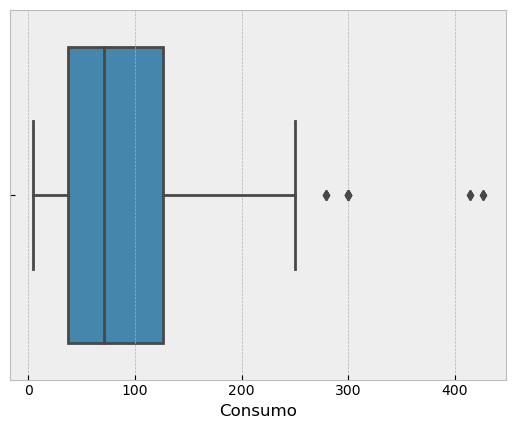

In [39]:
sns.boxplot(consumo_ameijoa["Consumo"])

In [40]:
# Tratar Outliers

In [41]:
consumo_ameijoa.reset_index(inplace=True)
consumo_ameijoa["Consumo"] = consumo_ameijoa["Consumo"].round(2)
consumo_ameijoa

,IAN_ID,Sexo,NUT,GrupoEtario,Porção_Ponderada,Freq.Cons,Consumo
0,7-03-02-0-02-343,Feminino,Região Autónoma dos Açores,Crianças,0.933800,0.621931,4.07
1,6-02-01-0-03-394,Feminino,Região Autónoma da Madeira,Crianças,1.015508,0.621931,4.42
2,7-03-06-0-03-169,Feminino,Região Autónoma dos Açores,Crianças,1.354010,0.621931,5.89
3,7-05-04-0-03-199,Feminino,Região Autónoma dos Açores,Adolescentes,1.354010,0.621931,5.89
4,1-04-01-0-13-032,Masculino,Norte,Crianças,2.033220,0.621931,8.85
...,...,...,...,...,...,...,...
165,2-21-01-1-16-001,Masculino,Centro,Adultos,68.803399,0.621931,299.54
166,5-05-01-0-15-122,Masculino,Algarve,Adultos,95.000000,0.621931,413.58
167,5-12-09-1-16-221,Masculino,Algarve,Adultos,95.000000,0.621931,413.58
168,5-11-01-0-16-054,Masculino,Algarve,Adultos,97.988718,0.621931,426.60


In [42]:
print(consumo_ameijoa.columns)

Index(['IAN_ID', 'Sexo', 'NUT', 'GrupoEtario', 'Porção_Ponderada', 'Freq.Cons',
       'Consumo'],
      dtype='object')


In [43]:
columns = ["Consumo"]
for i in columns:
    q3, q1 =np.percentile(consumo_ameijoa[i], [75,25])
    iqr = q3 - q1
    upper_limit = q3 + (1.5*iqr)
    lower_limit = q1 - (1.5*iqr)
    consumo_ameijoa.loc[ (consumo_ameijoa[i]>upper_limit) , i] = upper_limit
    consumo_ameijoa.loc[ (consumo_ameijoa[i]<lower_limit), i] = lower_limit

In [44]:
consumo_ameijoa.to_excel("consumo_ameijoa.xlsx")

<AxesSubplot:xlabel='Consumo'>

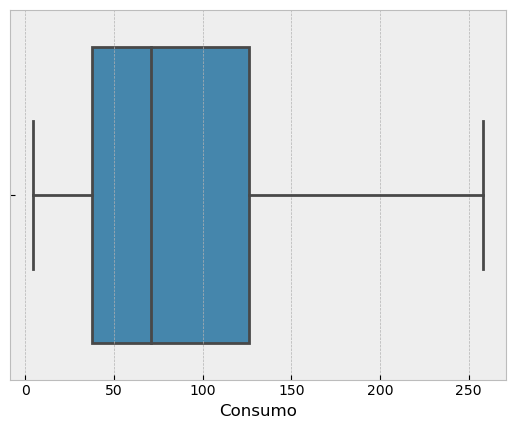

In [45]:
sns.boxplot(consumo_ameijoa["Consumo"])

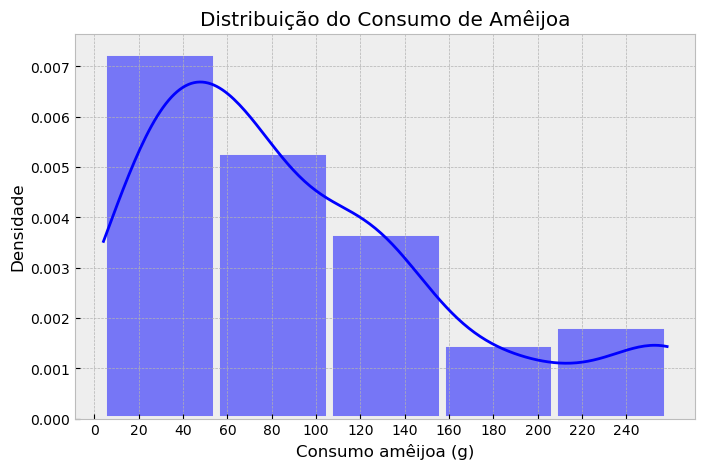

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(consumo_ameijoa["Consumo"], kde=True, bins=5, stat='density', linewidth=5)

plt.title("Distribuição do Consumo de Amêijoa")
plt.xticks(np.arange(0, max(consumo_ameijoa["Consumo"]), 20))
plt.xlabel('Consumo amêijoa (g)')
plt.ylabel('Densidade')
plt.show()

In [98]:
mean_consumption = round(consumo_ameijoa["Consumo"].mean(),0)
print(f"Consumo Semanal Médio de Amêijoa: {mean_consumption} g")

Consumo Semanal Médio de Amêijoa: 94.0 g


Ao analisar o histograma acima parece que os dados apresentam uma distribuição log-normal.

In [48]:
# Consumo de Amêijoa por Sexo
c_ameijoa_sexo = consumo_ameijoa.groupby("Sexo").agg(Consumo=("Consumo","mean"))
c_ameijoa_sexo["Consumo"] = c_ameijoa_sexo["Consumo"].round(2)
c_ameijoa_sexo

,Consumo
Sexo,
Feminino,83.72
Masculino,102.29


In [101]:
# Consumo de Amêijoa por Grupo Etário
c_ameijoa_grupo_etario = consumo_ameijoa.groupby("GrupoEtario").agg(Consumo=("Consumo","mean"))
c_ameijoa_grupo_etario["Consumo"] = c_ameijoa_grupo_etario["Consumo"].round(2)
c_ameijoa_grupo_etario.sort_values(by="Consumo",ascending=False, inplace=True)
c_ameijoa_grupo_etario

,Consumo
GrupoEtario,
Adultos,102.36
Adolescentes,94.35
Idosos,78.55
Crianças,57.70


In [99]:
# Consumo de Amêijoa por Nut
c_ameijoa_nut = consumo_ameijoa.groupby("NUT").agg(Consumo=("Consumo","mean"))
c_ameijoa_nut["Consumo"] = c_ameijoa_nut["Consumo"].round(2)
c_ameijoa_nut.sort_values(by="Consumo",ascending=False,inplace=True)
c_ameijoa_nut

,Consumo
NUT,
Algarve,118.87
Centro,98.89
Norte,94.30
Alentejo,91.18
Região Autónoma da Madeira,84.75
Área Metropolitina de Lisboa,80.63
Região Autónoma dos Açores,68.17


__Refeição__

In [51]:
ameijoa["Refeição"].value_counts()

Almoço                             113
Jantar                              88
Durante a tarde (Lanche)             4
Pequeno-almoço                       2
Durante a manhã (Meio da manhã)      1
Name: Refeição, dtype: int64

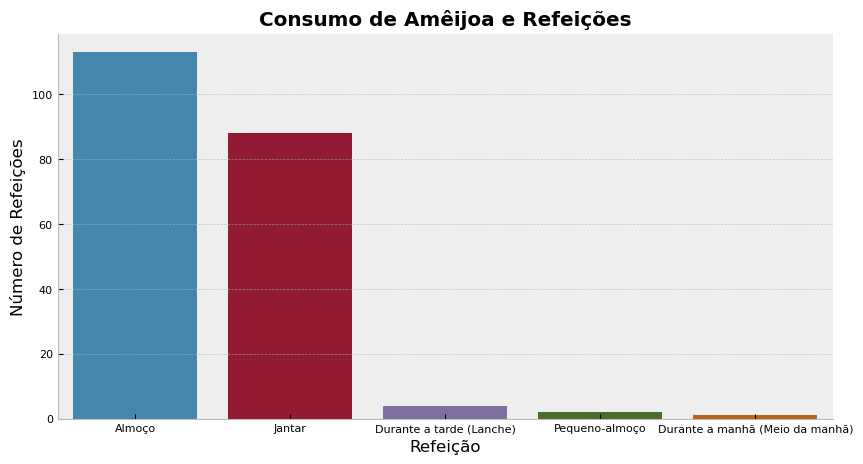

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x="Refeição", data=ameijoa, order=ameijoa["Refeição"].value_counts().index)

plt.title("Consumo de Amêijoa e Refeições", fontweight="bold")
plt.xlabel("Refeição")
plt.ylabel("Número de Refeições")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

Atráves do gráfico anterior é verificado que o consumo de ameijoa é maioritariamente efetuado ao almoço.

__Prato__

In [53]:
ameijoa["Prato"].value_counts()

Carne de Porco à Alentejana                                                              71
Massa de Marisco                                                                         48
Arroz de Marisco                                                                         23
Feijoada de Marisco                                                                      17
Amêijoas                                                                                 11
Molho de Amêijoa                                                                          8
Amêijoas à Bulhão Pato                                                                    6
Xérem                                                                                     6
Abrótea Assada com Molho de Amêijoa                                                       6
Massa de peixe                                                                            4
Cataplana de marisco                                                            

In [54]:
# Substituir pratos com número menor ou igual a 6 por "Outro"
counts = ameijoa["Prato"].value_counts()
ameijoa.loc[ameijoa["Prato"].isin(counts[counts <= 8].index), "Prato"] = "Outro"

In [55]:
ameijoa["Prato"].value_counts()

Carne de Porco à Alentejana    71
Massa de Marisco               48
Outro                          38
Arroz de Marisco               23
Feijoada de Marisco            17
Amêijoas                       11
Name: Prato, dtype: int64

In [108]:
prato = pd.DataFrame(ameijoa["Prato"].value_counts())
prato.reset_index(inplace=True)
prato.rename(columns={"index":"Prato","Prato":"Nº"},inplace=True)
prato

,Prato,Nº
0,Carne de Porco à Alentejana,71
1,Massa de Marisco,48
2,Outro,38
3,Arroz de Marisco,23
4,Feijoada de Marisco,17
5,Amêijoas,11


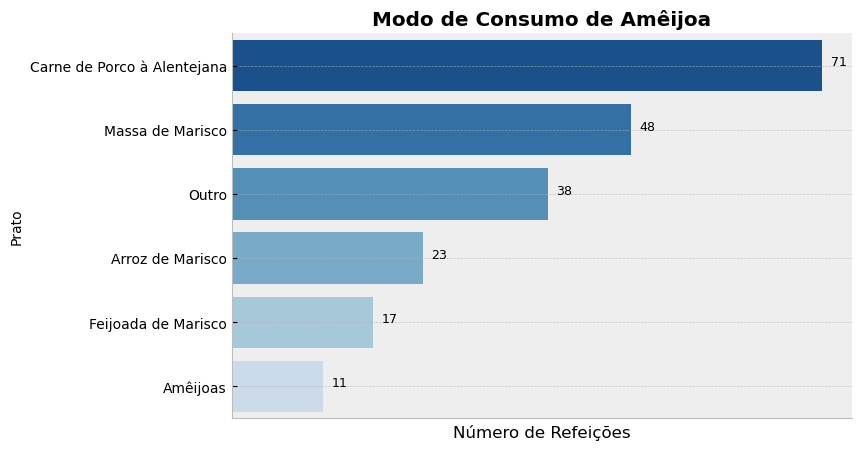

In [115]:
plt.figure(figsize=(8,5))
sns.countplot(y="Prato", data=ameijoa, order=ameijoa["Prato"].value_counts().index, palette=sns.color_palette("Blues_r", 7))

plt.title("Modo de Consumo de Amêijoa", fontweight="bold")
plt.xlabel("Número de Refeições")
plt.ylabel("Prato",fontsize=10)

plt.xticks([])
plt.yticks(fontsize=10)

for i, v in enumerate(prato["Nº"]):
    plt.text(v + 1, i, str(v), color='black', fontsize=9)

plt.grid(axis="y", linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

plt.show()

Tendo em consideração o consumo de ameijoa, é verificado que este consumo é mairitariamente efetuada através da incorporação de ameijoa em receitas, destacando-se a receita de "Carne de Porco à Alentejana"

# Conclusões

Uma análise exploratória aos referidos dados mostra que num total de 299 refeições relatadas por 204 indivíduos, 208 delas continham amêijoas como ingrediente principal, enquanto 44 delas tinham berbigão, 38 mexilhões, 4 conquilhas, 3 vieiras e apenas 2 refeições incluíam ostras como ingrediente (Figura 49). Relativamente à quantidade semanal é verificado através da tabela 26, que a espécie de amêijoa apresenta um consumo de 93 g/semana, sendo as ostras a espécie com menor quantidade semanal consumida, cerca de 0,2 g/semana.

Uma vez que a espécie de Amêijoa foi a espécie com maior quantidade semanal consumida, decidiu-se estudar com maior detalhe o consumo de amêijoa por sexo, região do país e também por grupo etário, sendo então pertinente efetuar o estudo de avaliação de risco de chumbo apenas para a espécie de amêijoa. 

Foi verificado que indivíduos do sexo masculino é o sexo com menor consumo semanal de amêijoa, com cerca de 102 g/semana. Já o sexo feminino apresenta um consumo de 84g/semana.

Relativamente ao consumo de amêijoa por região do país, é verificado que o consumo de amêijoa é mais acentuado na região do Algarve, onde os indivíduos desta região apresentam um consumo semanal de cerca de 119g/semana. Por outro lado, a região autónoma dos Açores, é a que apresenta um menor consumo desta espécie, com cerca de 68 g/semana.

Analisando o consumo de amêijoa por grupo etário, é observado que o consumo de amêijoa é mais acentuado em adultos (18 -84 anos). Indivíduos deste grupo etário apresentam um consumo semanal de cerca de 102 g/semana. Contrariamente o grupo etário das crianças (< 10 anos), apresenta o menor consumo desta espécie de molusco bivalve, cerca de 58 g/semana.


Tal como mencionado anteriormente foi verificado que num total de 299 refeições analisadas 204 das referidas refeições referem-se a amêijoa como ingrediente integrante. De modo a perceber como é feito o consumo de amêijoas, e uma vez que o inquérito IAN AF apresenta a informação acerca da receita consumida em cada refeição, foi possível determinar o modo como esta espécie de molusco bivalve é consumida, na figura 50 é possível observar os respetivos resultados. Através da análise da referida figura é concluído que na maioria dos casos de consumo, as amêijoas são consumidas integradas em receitas, destacando-se a receita de carne de porco à alentejana como a mais consumida. É ainda possível verificar que apenas 5% do consumo de amêijoa se refere a amêijoas ao natural  ou sem ser consumida com incorporação de outros ingredientes